# Problem Set 2:
# 1
### a) *Find the smallest number $\epsilon$ such that $1 - \epsilon \neq 1$*

In [35]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [36]:
n = 1
coef = 1e-17 
e = 1e-17 # This is the first e checked

# Stop when the condition 1 - e != 1 is satisfied
while 1 - e == 1: 
    n += 1e-6 
    e = n*coef # Increase the initial guess by 0.000006%
print(f"{e:.22f} is approximately the smallest number such that 1 - e /= 1")
1 - e == 1

0.0000000000000000555112 is approximately the smallest number such that 1 - e /= 1


False

### b) *The smallest $\epsilon$ such that  $1.0 + \epsilon \neq 1$*

In [37]:
# Use the same test as before but flip the arithmatic:
n = 1
coef = 1e-17
e = 1e-17
while 1 + e == 1: 
    n += 1e-6
    e = n*coef
print(f"{e:0.22f} is approximately the smallest number such that 1 + e /= 1")
1 + e == 1

0.0000000000000001110223 is approximately the smallest number such that 1 + e /= 1


False

### c) *The maximum representable number*

In [38]:
val = 10.0**300.0 # Approximately the largest number
a = 300.0 #The first exponent to check
while val != np.inf:
        valLast = val
        a += 10.0/10000.0
        val = 10**a

OverflowError: (34, 'Numerical result out of range')

In [46]:
print(f"The largest value is {valLast}")

The largest value is 1.794733626025935e+308


The above error is acceptable since we were looking for when the number went out of range. That said I don't know why it didn't just set the number equal to infinity. Regardless we know the number just before was still with the range so we take that number to be the largest representable float.  

### d) *The smallest positive value*

In [47]:
# Same as before only this time switch the sign of the exponent
val = 10.0**-300.0
a = 300.0
while val != 0:
    valLast = val
    a += 10.0/100000
    val = 10.0**-a
print(f"The smallest representable value is {valLast}")

The smallest representable value is 5e-324


The IEEE 754 representation allows 1 bit for sign, 11 for exponent and 53 bit significand precision including the hidden bit. With 11 bits for the exponent, the largest exponent can be 2047. Since the exponent is biased, the smallest and largest exponents are -1022 and 1023 since the exponents -1023 adn 1024 are reserved for special numbers. The mantissa represents the places following the decimal. 2^52 is some 16 digit number meaning there are 16 significant digits. With this in mind, the largest representable number is given by 1 + (1 - 2^-52) * 2^1023

In [39]:
(1. + (1. - 2.**-52)) * 2.**1023

1.7976931348623157e+308

And the smallest number is given by 

In [40]:
2**-52 * 2**-1022

5e-324

Finally the smallest number that can be added to one to have it not equal one. This gap is given by 2^-52/2.

# 2

/tmp/ipykernel_141/2865837632.py:3: RuntimeWarning: invalid value encountered in true_divide
  func = (1 - np.cos(x))/x**2


(1e-07, 0.0)

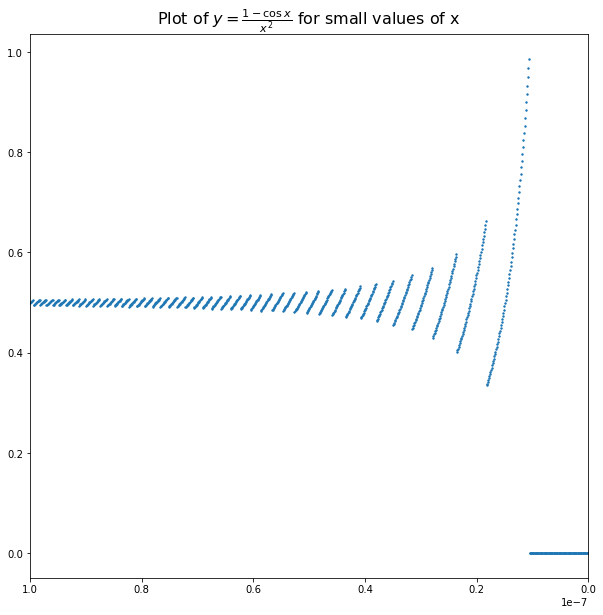

In [41]:
# Make x for values 10^-7 and smaller
x = np.linspace(0, 1e-7, 1000)
func = (1 - np.cos(x))/x**2

fig, ax = plt.subplots(1,1, figsize = (10, 10))
ax.scatter(x, func, s= 2)
ax.set_title("Plot of $y = \\frac{1 - \cos{x}}{x^2}$ for small values of x", fontsize = 16) 
plt.xlim(1e-7, 0)

The analytic limit of this function is $\frac{1}{2}$. The x axis is reversed so that values are decreasing towards the right in order to illustrate the limit as x approaches 0. It can be seen that numerically this function *diverges* for $x \rightarrow 0$. The reason for this is that the rounding error is a large fraction of the result of $1 - \cos{x}$. This fraction in creases as x decreases and as a result the numerical evaluation of the function diverges as x approaches 0. 

# 3
### a) 

In [42]:
def linear_interpolate(file, x):
    # A function to perform linear interpolation using data inside
    # "file" at the point "x"
    
    # Read in the file
    file = np.loadtxt(file, skiprows = 1)
    
    nearest_idx = np.argmin(np.abs(file[:,0] - x))

    if file[nearest_idx, 0] <= x: 
        #Perform interpolation using point above nearest_idx
        
        # Creates a linear regression between the points nearest to x
        result = scipy.stats.linregress([file[nearest_idx, 0], 
                                   file[nearest_idx + 1, 0]],
                                  [file[nearest_idx, 1], 
                                   file[nearest_idx + 1, 1]])
    
        return result.slope * x + result.intercept
    
    else: 
        #Perform interpolation using point below nearest_idx
        
        result = scipy.stats.linregress([file[nearest_idx, 0], 
                                   file[nearest_idx - 1, 0]],
                                  [file[nearest_idx, 1], 
                                   file[nearest_idx - 1, 1]])

        return result.slope * x + result.intercept

### b)

In [43]:
print(f"Linear interpolation gives a value of {linear_interpolate("ps2data.txt", 0.75)} for x = 0.75")

SyntaxError: f-string: unmatched '(' (530573203.py, line 1)

In [44]:
# Load in the data
data = np.loadtxt("ps2data.txt", skiprows = 1)
xdata = data[:,0]
ydata = data[:,1]

def nevilles(xd, yd, x): 
    n = len(xd) # The length of our data
    p = n*[0] # Something to store the value of the polynomial at that point
    for i in range(n): # For every column
        for j in range(n - i): # Compute each term of the polynoial
            if i == 0:
                p[j] = yd[j] # The first column, each term is equal to the value for y
            else:
                p[j] = ((x - xd[i + j]) * p[j] + # Perform polynomial interpolation \ 
                        (xd[j] - x) * p[j + 1]) / \
                        (xd[j] - xd[j + i])
    return p[0] 

# The value of the approximation for x = 0.75
print(f"polynomial interpolation gives a value of {nevilles(xdata, ydata, 0.75)} for x = 0.75")

polynomial interpolation gives a value of -0.3568260996875 for x = 0.75


In order to judge the appropriateness of this interpolation, it would be useful to see it's approximation for a range of points that covers the same range as the data

Text(0.5, 1.0, 'Interpolation demonstration using $y = \\frac{1}{1+25x^2}$')

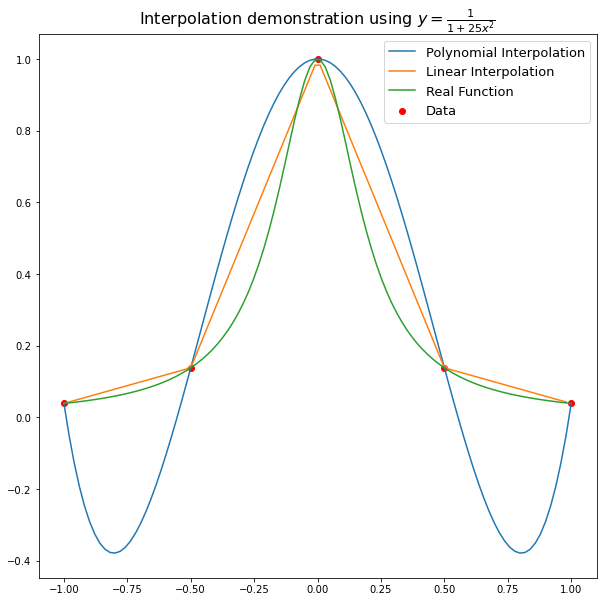

In [45]:
fig, ax = plt.subplots(1,1, figsize = (10, 10))
x = np.linspace(min(xdata), max(xdata), 100) # Range of values to use for interpolation
y_nev = [nevilles(xdata, ydata, i) for i in x] # Y values given by nevilles algorithm

ax.plot(x,y_nev, label = "Polynomial Interpolation")

# Perform linear interpolation for almost the same domain
file = 'ps2data.txt'
y_lin = [linear_interpolate(file, i) for i in x[:-1]] 

ax.plot(x[:-1], y_lin, label = "Linear Interpolation")

# Plot the data used for interpolation
ax.scatter(xdata, ydata, label = "Data", color = 'r', alpha = 1)

# Plot the function itself
y = 1/(1+ 25*x**2)
ax.plot(x, y, label = "Real Function")

ax.legend(fontsize = 13)
ax.set_title("Interpolation demonstration using $y = \\frac{1}{1+25x^2}$", fontsize = 16)

The value of the function is actually in between the values given by linear interpolation and the fourth order polynomial. That said, the linear interpolation gives a better estimate than the fourth oder polynomial interpolation judging by the distance from the actual function to the curves. The results here are not surprising: The points for the interpolation lie at roughly the roots of the orinal curve. In this scenario, linear interpolation does not miss any crucial turns of the orignal function. If for instance the point at x = 0 was not included as an interpolation point, linear interpolation would underestimate the value of the function at that point very severely depending on where the points around x = 0 were located for interpolation. 

Polynomial approximation also suffers from over and underestimations for higher order polynomials, called runges phenomenon. This is especially important near the edges of the interpolation, like how 0.75 lies between the second to last, and last points used for interpolation. 